In [119]:
import pandas as pd

# 輸入 .xls 檔案的路徑
xls_file_path = 'D:\Siyu\Data Mining\HW3\新竹_2021.xls'

# 讀取 .xls 檔案
data = pd.read_excel(xls_file_path, engine='xlrd')

# 定義輸出的 .csv 檔案路徑
csv_file_path = '新竹_2021.csv'

# 將資料儲存為 .csv 檔案
data.to_csv(csv_file_path, index=False, encoding='utf-8')

print("新竹_2021.csv 格式！")


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ds\AppData\Local\Temp\ipykernel_12960\3421722117.py:4: SyntaxWarning: invalid escape sequence '\S'
  xls_file_path = 'D:\Siyu\Data Mining\HW3\新竹_2021.xls'


新竹_2021.csv 格式！


In [102]:
# Install necessary libraries
!pip install xlrd==2.0.1
!pip install xgboost

In [121]:
# Load the newly uploaded CSV file to verify its contents and proceed with the analysis
csv_file_path = '新竹_2021.csv'
data = pd.read_csv(csv_file_path)

# Display the first few rows to understand the structure of the CSV data
data.head()

,測站,日期,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,--------------------,--------------------,--------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,...,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------,-------------------------------
1,新竹,2021-01-01 00:00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
2,新竹,2021-01-01 00:00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
3,新竹,2021-01-01 00:00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
4,新竹,2021-01-01 00:00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06


In [123]:
# Filter out rows where '日期' or '測項' columns have invalid entries (non-date, non-parameter rows)
# Keeping only rows where '日期' column contains recognizable dates
data_filtered = data[data['日期'].str.match(r'^\d{4}-\d{2}-\d{2}.*', na=False)]

# Convert '數值' columns to numeric, forcing errors to NaN, to handle any non-numeric values
for col in data_filtered.columns[3:]:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Reshape the data again after filtering
melted_data = data_filtered.melt(id_vars=["測站", "日期", "測項"], var_name="小時", value_name="數值")
melted_data["datetime"] = pd.to_datetime(melted_data["日期"]) + pd.to_timedelta(melted_data["小時"].astype(int), unit="h")

# Pivot the table to get each pollutant as a column with datetime as the index
reshaped_data = melted_data.pivot_table(index="datetime", columns="測項", values="數值", aggfunc="first")
reshaped_data.reset_index(inplace=True)

# Display the first few rows to confirm the reshaping
reshaped_data.head()

C:\Users\ds\AppData\Local\Temp\ipykernel_12960\3008555711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')


測項,datetime,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2021-01-01 00:00:00,11.1,2.01,0.31,0.10,1.5,11.9,13.5,21.6,38.0,25.0,0.0,64.0,NaN,2.11,38.0,53.0,3.0,2.6
1,2021-01-01 01:00:00,11.2,1.99,0.28,0.10,1.4,10.4,11.9,25.1,29.0,24.0,0.0,65.0,2.1,2.09,41.0,46.0,3.4,2.4
2,2021-01-01 02:00:00,11.4,2.00,0.28,0.08,1.4,9.8,11.2,25.6,27.0,13.0,0.0,63.0,2.1,2.08,49.0,43.0,2.7,2.5
3,2021-01-01 03:00:00,11.5,2.02,0.33,0.09,1.5,12.1,13.7,22.4,24.0,14.0,0.0,63.0,1.8,2.11,54.0,54.0,3.0,2.5
4,2021-01-01 04:00:00,11.6,2.03,0.32,0.10,1.4,12.4,13.9,21.1,29.0,15.0,0.0,63.0,1.1,2.13,50.0,50.0,2.6,2.1


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


In [127]:
# Check and clean column names to ensure there are no extra spaces or special characters
reshaped_data.columns = reshaped_data.columns.str.strip()

# Verify column names to confirm PM2.5 is available and correctly labeled
reshaped_data.columns.tolist()

['AMB_TEMP',
 'CH4',
 'CO',
 'NMHC',
 'NO',
 'NO2',
 'NOx',
 'O3',
 'PM10',
 'PM2.5',
 'RAINFALL',
 'RH',
 'SO2',
 'THC',
 'WD_HR',
 'WIND_DIREC',
 'WIND_SPEED',
 'WS_HR']

In [129]:
# Re-run the feature and target creation with the verified "PM2.5" column

# Using PM2.5 data to create features and targets for both 1-hour and 6-hour predictions
X_train_1, y_train_1 = create_time_series_features(train_data[['PM2.5']], 'PM2.5', prediction_hour=1)
X_train_6, y_train_6 = create_time_series_features(train_data[['PM2.5']], 'PM2.5', prediction_hour=6)

X_test_1, y_test_1 = create_time_series_features(test_data[['PM2.5']], 'PM2.5', prediction_hour=1)
X_test_6, y_test_6 = create_time_series_features(test_data[['PM2.5']], 'PM2.5', prediction_hour=6)

# Check the columns in train_data and test_data to verify if "PM2.5" exists
train_data.columns, test_data.columns

(Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
        'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
        'WIND_SPEED', 'WS_HR'],
       dtype='object', name='測項'),
 Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
        'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
        'WIND_SPEED', 'WS_HR'],
       dtype='object', name='測項'))

In [130]:
# Remove extra whitespace from column names in both train_data and test_data
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Verify column names after stripping whitespace
train_data.columns, test_data.columns


(Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
        'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
        'WIND_SPEED', 'WS_HR'],
       dtype='object', name='測項'),
 Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
        'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
        'WIND_SPEED', 'WS_HR'],
       dtype='object', name='測項'))

In [134]:
# 創建時間序列特徵的函數
def create_time_series_features(data, target_col, prediction_hour=1, use_all_features=False):
    X, y = [], []
    for i in range(len(data) - 6 - prediction_hour + 1):
        if use_all_features:
            X.append(data.iloc[i:i+6].values.flatten())  # 使用前 6 小時的所有特徵數據
        else:
            X.append(data[[target_col]].iloc[i:i+6].values.flatten())  # 僅使用 PM2.5
        y.append(data.iloc[i+6+prediction_hour-1][target_col])  # 目標值
    return np.array(X), np.array(y)

In [135]:
# 創建特徵與目標
# 僅使用 PM2.5
X_train_1, y_train_1 = create_time_series_features(train_data, 'PM2.5', prediction_hour=1)
X_train_6, y_train_6 = create_time_series_features(train_data, 'PM2.5', prediction_hour=6)
X_test_1, y_test_1 = create_time_series_features(test_data, 'PM2.5', prediction_hour=1)
X_test_6, y_test_6 = create_time_series_features(test_data, 'PM2.5', prediction_hour=6)

# 使用所有特徵
X_train_all_1, y_train_all_1 = create_time_series_features(train_data, 'PM2.5', prediction_hour=1, use_all_features=True)
X_train_all_6, y_train_all_6 = create_time_series_features(train_data, 'PM2.5', prediction_hour=6, use_all_features=True)
X_test_all_1, y_test_all_1 = create_time_series_features(test_data, 'PM2.5', prediction_hour=1, use_all_features=True)
X_test_all_6, y_test_all_6 = create_time_series_features(test_data, 'PM2.5', prediction_hour=6, use_all_features=True)

# 計算 MAE 結果
results = {}

In [136]:
# 線性回歸
lr = LinearRegression()
# 僅 PM2.5
lr.fit(X_train_1, y_train_1)
results["Linear Regression (PM2.5 only, 1-hr)"] = mean_absolute_error(y_test_1, lr.predict(X_test_1))
lr.fit(X_train_6, y_train_6)
results["Linear Regression (PM2.5 only, 6-hr)"] = mean_absolute_error(y_test_6, lr.predict(X_test_6))

# 所有特徵
lr.fit(X_train_all_1, y_train_all_1)
results["Linear Regression (all features, 1-hr)"] = mean_absolute_error(y_test_all_1, lr.predict(X_test_all_1))
lr.fit(X_train_all_6, y_train_all_6)
results["Linear Regression (all features, 6-hr)"] = mean_absolute_error(y_test_all_6, lr.predict(X_test_all_6))


In [139]:
# XGBoost
xgb = XGBRegressor(objective='reg:squarederror')
# 僅 PM2.5
xgb.fit(X_train_1, y_train_1)
results["XGBoost (PM2.5 only, 1-hr)"] = mean_absolute_error(y_test_1, xgb.predict(X_test_1))
xgb.fit(X_train_6, y_train_6)
results["XGBoost (PM2.5 only, 6-hr)"] = mean_absolute_error(y_test_6, xgb.predict(X_test_6))

# 所有特徵
xgb.fit(X_train_all_1, y_train_all_1)
results["XGBoost (all features, 1-hr)"] = mean_absolute_error(y_test_all_1, xgb.predict(X_test_all_1))
xgb.fit(X_train_all_6, y_train_all_6)
results["XGBoost (all features, 6-hr)"] = mean_absolute_error(y_test_all_6, xgb.predict(X_test_all_6))

In [140]:
# 顯示結果
for key, value in results.items():
    print(f"{key}: MAE = {value}")

Linear Regression (PM2.5 only, 1-hr): MAE = 2.6784610926768067
Linear Regression (PM2.5 only, 6-hr): MAE = 4.307013517163868
Linear Regression (all features, 1-hr): MAE = 2.649771845807222
Linear Regression (all features, 6-hr): MAE = 4.270629253628853
XGBoost (PM2.5 only, 1-hr): MAE = 3.1131107543865193
XGBoost (PM2.5 only, 6-hr): MAE = 4.972211933721462
XGBoost (all features, 1-hr): MAE = 3.1492473252097444
XGBoost (all features, 6-hr): MAE = 4.829627717175555


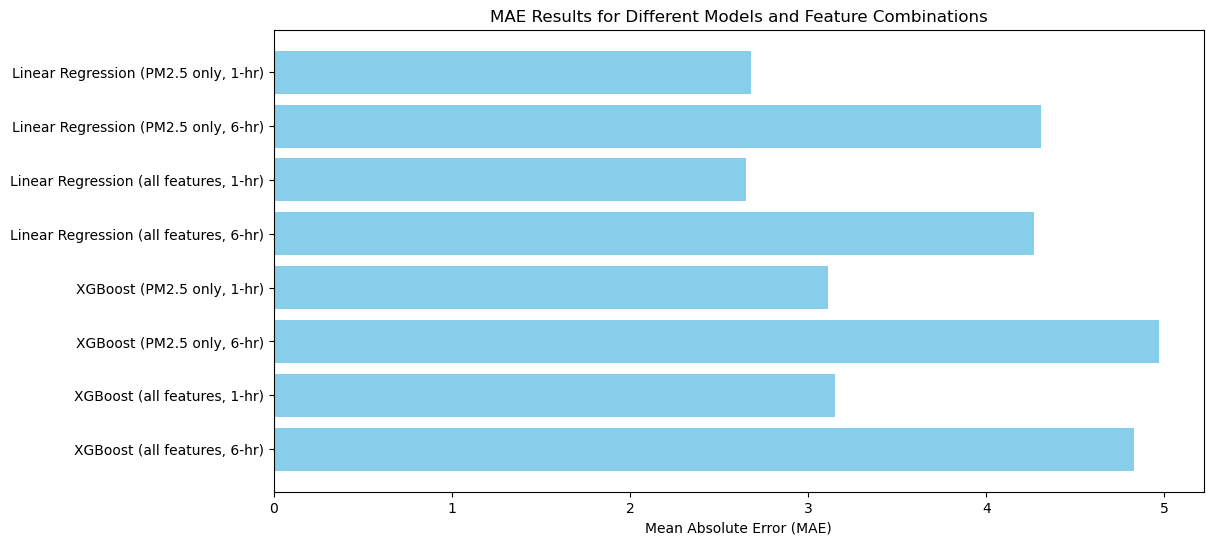

In [142]:
import matplotlib.pyplot as plt

# Define the plotting function for each model's MAE results
def plot_mae_results(results):
    labels = list(results.keys())
    mae_values = list(results.values())

    plt.figure(figsize=(12, 6))
    plt.barh(labels, mae_values, color='skyblue')
    plt.xlabel("Mean Absolute Error (MAE)")
    plt.title("MAE Results for Different Models and Feature Combinations")
    plt.gca().invert_yaxis()
    plt.show()

# Display the plot
plot_mae_results(results)
